In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

<AxesSubplot:>

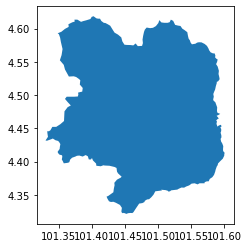

In [5]:
## Step 1: getting to know the geodata
SA1 = gpd.read_file('Study_Area_1.shp')
SA1.plot()

<AxesSubplot:>

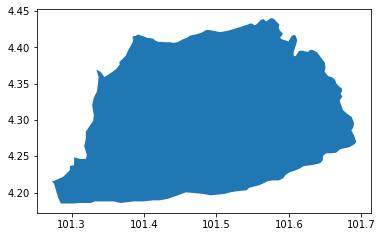

In [4]:
SA2 = gpd.read_file('Study_Area_2.shp')
SA2.plot()

<AxesSubplot:>

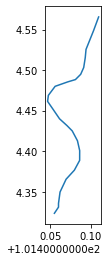

In [6]:
river = gpd.read_file('river.shp')
river.plot()

<AxesSubplot:>

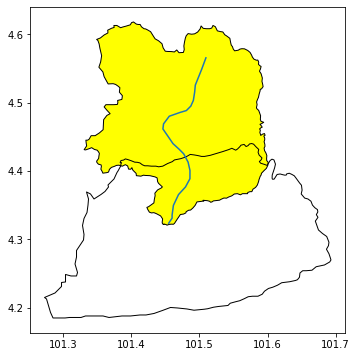

In [11]:
fig, ax = plt.subplots(figsize = (8, 6))
SA1.plot(ax = ax, color ='yellow', edgecolor = 'black')
SA2.plot(ax = ax, color = 'none', edgecolor = 'black')
river.plot(ax = ax)

<AxesSubplot:>

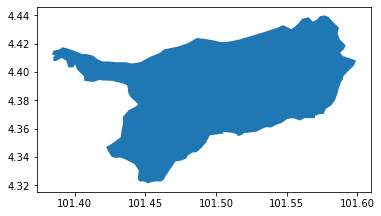

In [13]:
## Application 1 - Intersection of Polygons (SA1 and SA2)
intersection = gpd.overlay(SA1, SA2, how = 'intersection')
intersection.plot()

,desc_1,desc_2,geometry
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44456 4.32501, 101.44529 4.33050..."
1,Study_Area_1,None,"POLYGON ((101.38479 4.40801, 101.38479 4.40801..."
2,None,Study_Area_2,"POLYGON ((101.38479 4.40764, 101.38479 4.40801..."


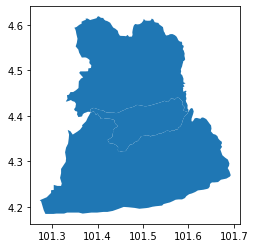

In [15]:
## Application 2 - Union of Polygons (SA1 and SA2)
union = gpd.overlay(SA1, SA2, how = 'union')
union.plot()
union

<AxesSubplot:>

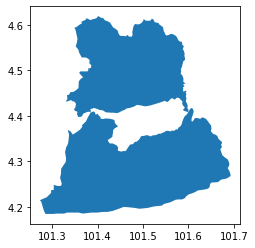

In [16]:
## Application 3 - Symmetric Difference of Polygons -> (Union - Intersection)(SA1 and SA2)
sd = gpd.overlay(SA1, SA2, how = 'symmetric_difference')
sd.plot()

<AxesSubplot:>

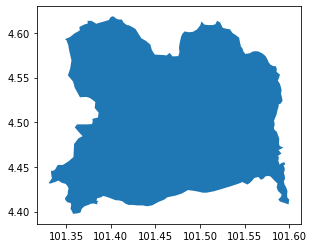

In [17]:
## Application 4a - Difference of Polygons -> (SA1 - Intersection) - order sensitive
difference1 = gpd.overlay(SA1, SA2, how = 'difference')
difference1.plot()

<AxesSubplot:>

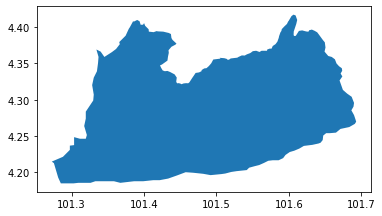

In [18]:
## Application 4b - Difference of Polygons -> (SA2 - Intersection) - order sensitive
difference2 = gpd.overlay(SA2, SA1, how = 'difference')
difference2.plot()

,desc_1,desc_2,geometry,common_column
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44456 4.32501, 101.44529 4.33050...",1
1,Study_Area_1,None,"POLYGON ((101.38479 4.40801, 101.38479 4.40801...",1
2,None,Study_Area_2,"POLYGON ((101.38479 4.40764, 101.38479 4.40801...",1


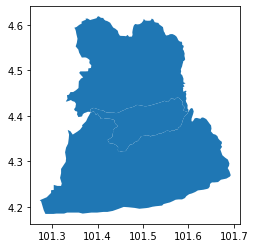

In [21]:
## Application 5 - Dissolve of Polygons(SA1 and SA2)

union = gpd.overlay(SA1, SA2, how = 'union')
union.plot()
union['common_column'] = 1 # for dissolve
union

,geometry,desc_1,desc_2
common_column,,,
1,"POLYGON ((101.38479 4.40764, 101.38479 4.40801...",Study_Area_1,Study_Area_2


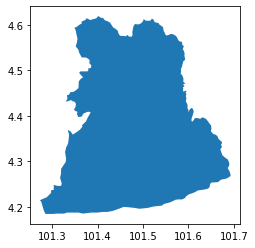

In [22]:
## Application 5 - Dissolve of Polygons(SA1 and SA2)

dissolved_sa = union.dissolve(by = 'common_column')
dissolved_sa.plot() 
dissolved_sa